```
AUC-ROC 곡선은 다양한 임계값에서 모델의 분류성능에 대한 측정 그래프

ROC(Receiver Operator Characteristic) : 모든 임계값에서 분류 모델의 성능을 보여주는 그래프

AUC(Area Under the Curve) : ROC 곡선 아래의 영역(AUC가 높으면 클래스를 구별하는 모델의 성능이 훌륭하다는 의미)

임상에서는 정상인 및 환자 클래스를 구분하는 모델의 성능 평가로 흔히 사용

ROC곡선은 TPR(민감도)이 y축에 있고, FPR(1-민감도(specificity))이 x축으로 그려짐
```

```
민감도(sensitivity) : 실제로 병이 있을 때, 검사 결과가 양성인 경우

특이도(specificity) : 실제로 병이 있을 때, 검사 결과가 음성인 경우
```

```
AUC 값이 0에 가까울수록 클래스 분류하는 성능이 떨어짐을 의미하고 1에 가까울수록 클래스 분류하는 성능이 뛰어남을 의미.

실제로 최소값은 0.5로, 이 경우 모델의 클래스 분리 능력이 거의 없음을 의미
```

```
민감도와 특이성은 서로 반비례

Threshold(임계값)을 줄이면, positive rate이 높아져 민감도 상승, 특이도 감소

Threshold(임계값)을 높이면, positive rate이 낮아져 민감도 감소, 특이도 상승
```

```
precision과 recall을 모두 표현하기 위해 F1 score와 AUC 필요

F1 score = precision과 recall의 조화평균

= 2precisionrecall/(precision+recall)

AUC = ROC 그래프의 면적 = 1~0.5 = 면적이 클수록 성능이 좋다.

성능 척도 => F1 score, AUC

F1 score를 쓰는 이유!! 분류 클래스 모델이 있다고 하자. A,B,C 클래스가 있는데 A 클래스에 대해서만 분류가 잘되는 경우와 A 클래스에 대해 분류가 덜 되지만 B, C 클래스를 분류하는 경우 중에서 A 데이터가 월등히 많은 경우 전자 모델이 정확도가 훨씬 좋게 나올 것이다. 하지만 전자 모델은 B, C 클래스를 분류를 잘못하는데 말이지. 이러한 경우 F1 score를 계산하면 전자 보다 후자 모델이 더 성능이 좋다는 것을 알 수 있다.
```

# ROC, AUC

In [1]:
import numpy as np
from numpy import interp
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn.metrics import roc_curve, auc

def draw_ROC_and_get_AUC(y_test, y_score, n_classes=2):

  y_test = np.eye(n_classes)[y_test]
  y_score = np.eye(n_classes)[y_score]

  # Plot linewidth.
  lw = 2

  # Compute ROC curve and ROC area for each class
  fpr = dict()
  tpr = dict()
  roc_auc = dict()
  for i in range(n_classes):
      fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
      roc_auc[i] = auc(fpr[i], tpr[i])

  # Compute micro-average ROC curve and ROC area
  fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
  roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

  # Compute macro-average ROC curve and ROC area

  # First aggregate all false positive rates
  all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

  # Then interpolate all ROC curves at this points
  mean_tpr = np.zeros_like(all_fpr)
  for i in range(n_classes):
      mean_tpr += interp(all_fpr, fpr[i], tpr[i])

  # Finally average it and compute AUC
  mean_tpr /= n_classes

  fpr["macro"] = all_fpr
  tpr["macro"] = mean_tpr
  roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

  # Plot all ROC curves
  plt.figure(1)
  plt.plot(fpr["macro"], tpr["macro"],
          label='ROC curve (area = {0:0.2f})'
                ''.format(roc_auc["macro"]),
          color='navy', linestyle=':', linewidth=4)

  colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
  for i, color in zip(range(n_classes), colors):
      plt.plot(fpr[i], tpr[i], color=color, lw=lw,
              label='ROC curve of class {0} (area = {1:0.2f})'
              ''.format(i, roc_auc[i]))

  plt.plot([0, 1], [0, 1], 'k--', lw=lw)
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Some extension of Receiver operating characteristic to multi-class')
  plt.legend(loc="lower right")
  plt.show()

  return roc_auc["macro"]

# 2개 클래스

## 데이터 준비

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
!wget https://raw.githubusercontent.com/dhrim/MDC_2021/master/material/deep_learning/data/sonar.csv

--2022-01-18 06:21:56--  https://raw.githubusercontent.com/dhrim/MDC_2021/master/material/deep_learning/data/sonar.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87776 (86K) [text/plain]
Saving to: ‘sonar.csv’

sonar.csv           100%[===================>]  85.72K  --.-KB/s    in 0.02s   

2022-01-18 06:21:56 (5.13 MB/s) - ‘sonar.csv’ saved [87776/87776]



In [4]:
raw_data = pd.read_csv("sonar.csv")
data = raw_data.to_numpy()
np.random.shuffle(data)

x = data[:,:60]
y = data[:,60].astype(np.int)

split_index = int(len(x)*0.8)
train_x, test_x = x[:split_index], x[split_index:]
train_y, test_y = y[:split_index], y[split_index:]

## 학습

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                610       
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 731
Trainable params: 731
Non-trainable params: 0
_________________________________________________________________


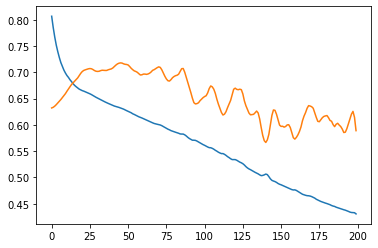

2/2 [==============================] - 0s 7ms/step - loss: 0.3942 - acc: 0.7857
loss= 0.3941950500011444
acc= 0.7857142686843872


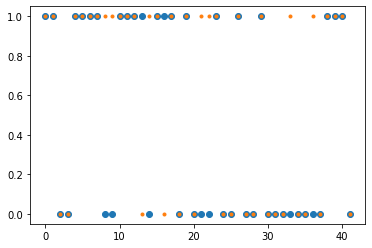

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense
from tensorflow.keras.metrics import AUC, Precision, Recall

model = keras.Sequential()
model.add(Dense(10, activation='relu', input_shape=(60,)))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation="sigmoid"))

model.compile(optimizer="Adam", loss="binary_crossentropy", metrics=["acc"])
model.summary()

history = model.fit(train_x, train_y, epochs=200, verbose=0, batch_size=128, validation_split=0.1)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()



loss, acc = model.evaluate(test_x, test_y)
print("loss=", loss)
print("acc=", acc)




y_ = model.predict(test_x)
predicted = (y_>0.5).astype(np.int).squeeze()

plt.plot(test_y, "o")
plt.plot(predicted, ".")
plt.show()

## ROC 그리기, AUC 출력

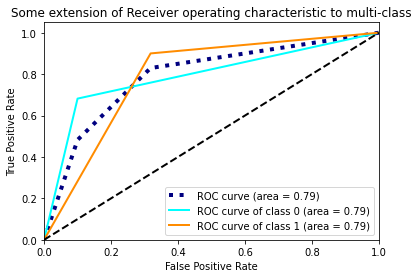

AUC  0.790909090909091


In [6]:
auc = draw_ROC_and_get_AUC(test_y, predicted, n_classes=2)
print("AUC ", auc)

## Confusion Matric

confusion matrix (오차행렬) = 예측 성능을 측정하기 위해 예측값과 실제값을 비교하는 표

In [7]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(test_y, predicted)
print(cm)

[[15  7]
 [ 2 18]]


In [8]:
print(classification_report(test_y, predicted, target_names=['0','1']))

              precision    recall  f1-score   support

           0       0.88      0.68      0.77        22
           1       0.72      0.90      0.80        20

    accuracy                           0.79        42
   macro avg       0.80      0.79      0.78        42
weighted avg       0.81      0.79      0.78        42



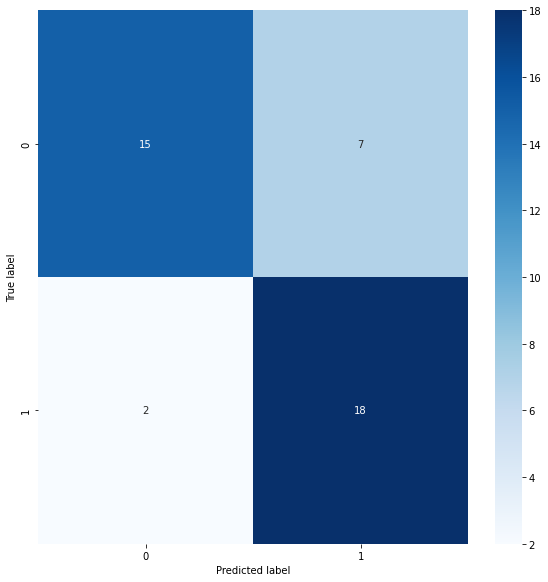

In [9]:
import seaborn as sns

figure = plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# n개 클래스

## 데이터 준비

In [26]:
(raw_train_x, raw_train_y), (raw_test_x, raw_test_y) = tf.keras.datasets.mnist.load_data()

train_x = raw_train_x/255
test_x = raw_test_x/255

train_y = raw_train_y
test_y = raw_test_y

## 학습

In [27]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Input, Reshape
from tensorflow.keras.metrics import *

import time


model = keras.Sequential()
model.add(Input((28,28)))
model.add(Reshape((28,28,1)))
model.add(Conv2D(32, (3, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.summary()


hist = model.fit(train_x, train_y, epochs=5, verbose=1, validation_split=0.1, batch_size=128)


loss, acc = model.evaluate(test_x, test_y)
print("loss=",loss)
print("acc=",acc)

y_ = model.predict(test_x)
predicted = np.argmax(y_, axis=1)

print(predicted)


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape_3 (Reshape)         (None, 28, 28, 1)         0         
                                                                 
 conv2d_6 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 1600)             

## ROC 그리기, AUC 출력

In [60]:
import numpy as np
from numpy import interp
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn.metrics import roc_curve, auc

def draw_ROC_and_get_AUC(y_test, y_score, n_classes=10):

  y_test = np.eye(n_classes)[y_test]
  y_score = np.eye(n_classes)[y_score]

  # Plot linewidth.
  lw = 10

  # Compute ROC curve and ROC area for each class
  fpr = dict()
  tpr = dict()
  roc_auc = dict()
  for i in range(n_classes):
      fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
      roc_auc[i] = auc(fpr[i], tpr[i])

  # Compute micro-average ROC curve and ROC area
  fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
  roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

  # Compute macro-average ROC curve and ROC area

  # First aggregate all false positive rates
  all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

  # Then interpolate all ROC curves at this points
  mean_tpr = np.zeros_like(all_fpr)
  for i in range(n_classes):
      mean_tpr += interp(all_fpr, fpr[i], tpr[i])

  # Finally average it and compute AUC
  mean_tpr /= n_classes

  fpr["macro"] = all_fpr
  tpr["macro"] = mean_tpr
  roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

  # Plot all ROC curves
  plt.figure(1)
  plt.plot(fpr["macro"], tpr["macro"],
          label='ROC curve (area = {0:0.2f})'
                ''.format(roc_auc["macro"]),
          color='navy', linestyle=':', linewidth=4)


  colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
  for i, color in zip(range(n_classes), colors):
      plt.plot(fpr[i], tpr[i], color=color, lw=lw,
              label='ROC curve of class {0} (area = {1:0.2f})'
              ''.format(i, roc_auc[i]))

  plt.plot([0, 1], [0, 1], 'k--', lw=lw)
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Some extension of Receiver operating characteristic to multi-class')
  plt.legend(loc="lower right")
  plt.show()

  return roc_auc["macro"]

In [61]:
test_y = test_y.astype(np.int)

In [62]:
print(test_y.shape)
print(predicted.shape)

(10000,)
(10000,)


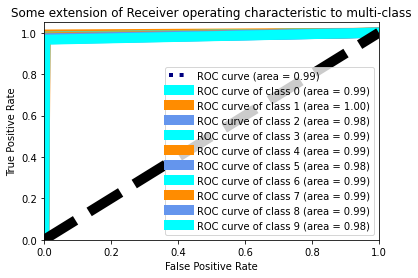

AUC  0.9872800034330507


In [63]:
auc = draw_ROC_and_get_AUC(test_y, predicted, n_classes=10)
print("AUC ", auc)

## Confusion Matric

In [13]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(test_y, predicted)
print(cm)

[[ 959    0    2    3    0    4    6    2    4    0]
 [   0 1123    2    0    0    0    4    6    0    0]
 [   0    1 1009    6    3    0    0   10    2    1]
 [   0    0    3  972    0   27    0    5    1    2]
 [   0    5    5    0  950    0    2    2    1   17]
 [   2    0    2    4    0  881    2    0    0    1]
 [   4    4    1    0    2   15  930    2    0    0]
 [   0    1   13    0    1    0    0 1008    0    5]
 [   2    1    9    4    1   31    0    2  913   11]
 [   1    1    0   12    5    2    0    6    3  979]]


In [15]:
print(classification_report(test_y, predicted, target_names=['0','1','2','3','4','5','6','7','8','9']))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.96      0.98      0.97      1032
           3       0.97      0.96      0.97      1010
           4       0.99      0.97      0.98       982
           5       0.92      0.99      0.95       892
           6       0.99      0.97      0.98       958
           7       0.97      0.98      0.97      1028
           8       0.99      0.94      0.96       974
           9       0.96      0.97      0.97      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



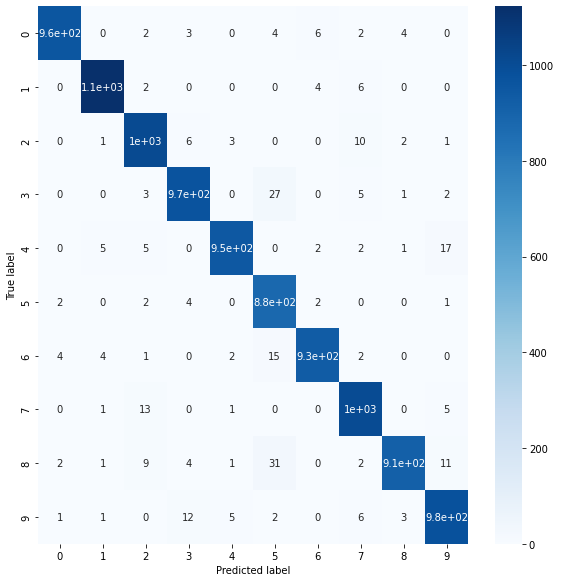

In [16]:
import seaborn as sns

figure = plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()